# Part I - (Fordgobike_trip Data Exploration)


## Introduction
It's a dataframe with 183412 rows of recorded information about individual rides in a bike sharing system and 16 columns including the information on the users, the starting and ending timepoint for use and start and end locations of the trips. Among them, the variable user_type has two categries Customer and Subscriber.

The main focus will be on analyzing the factors affecting the using timepoint of the day, duration_sec and which group is the main user.

The trip starting timepoint, location, the age and gender of users may have influence on duration_sec while gender and age may be relevant to the user type. Additionally, subscribers may be willing to use these bike than customers.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
df = pd.read_csv('201902_fordgobike_tripdata.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
12871,540,2019-02-27 17:08:58.9190,2019-02-27 17:17:59.8870,89.0,Division St at Potrero Ave,37.769218,-122.407646,109.0,17th St at Valencia St,37.763316,-122.421904,5149,Subscriber,1991.0,Female,No
99084,89,2019-02-14 21:43:14.8490,2019-02-14 21:44:43.8740,113.0,Franklin Square,37.764555,-122.410345,112.0,Harrison St at 17th St,37.763847,-122.413004,2758,Subscriber,1992.0,Male,No
5242,718,2019-02-28 13:35:06.3370,2019-02-28 13:47:04.3780,323.0,Broadway at Kearny,37.798014,-122.405950,47.0,4th St at Harrison St,37.780955,-122.399749,5021,Subscriber,1963.0,Female,No
165946,641,2019-02-04 20:55:35.0180,2019-02-04 21:06:16.3210,74.0,Laguna St at Hayes St,37.776435,-122.426244,114.0,Rhode Island St at 17th St,37.764478,-122.402570,4601,Subscriber,1994.0,Male,No
27713,514,2019-02-25 09:17:34.3690,2019-02-25 09:26:08.4840,130.0,22nd St Caltrain Station,37.757288,-122.392051,66.0,3rd St at Townsend St,37.778742,-122.392741,4929,Subscriber,1991.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.duplicated().sum()

0

In [7]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning:
    1. Data type should be changed: 
        start_time, end_time convert dtype to datetime; 
        Station_id to object;
        end_station_id to object;
        bike_id to object,
        user_type and member_gender to categorical type;
        birth_year to int.
    2. Missing values found in start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender. Consider fix or dropna. 

In [10]:
df_clean = df

In order to find what is the popular time for using sharing bike, the data type for the start_time and end_time were changed into datetime so that we can get values for specific time point and the day easily. 

In [11]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [12]:
column_names = ['start_station_id', 'end_station_id', 'bike_id']
for column_name in column_names:
        df_clean[column_name] = df_clean[column_name].astype(str)

In [13]:
df_clean[['user_type', 'member_gender']] = df_clean[['user_type', 'member_gender']].astype('category')

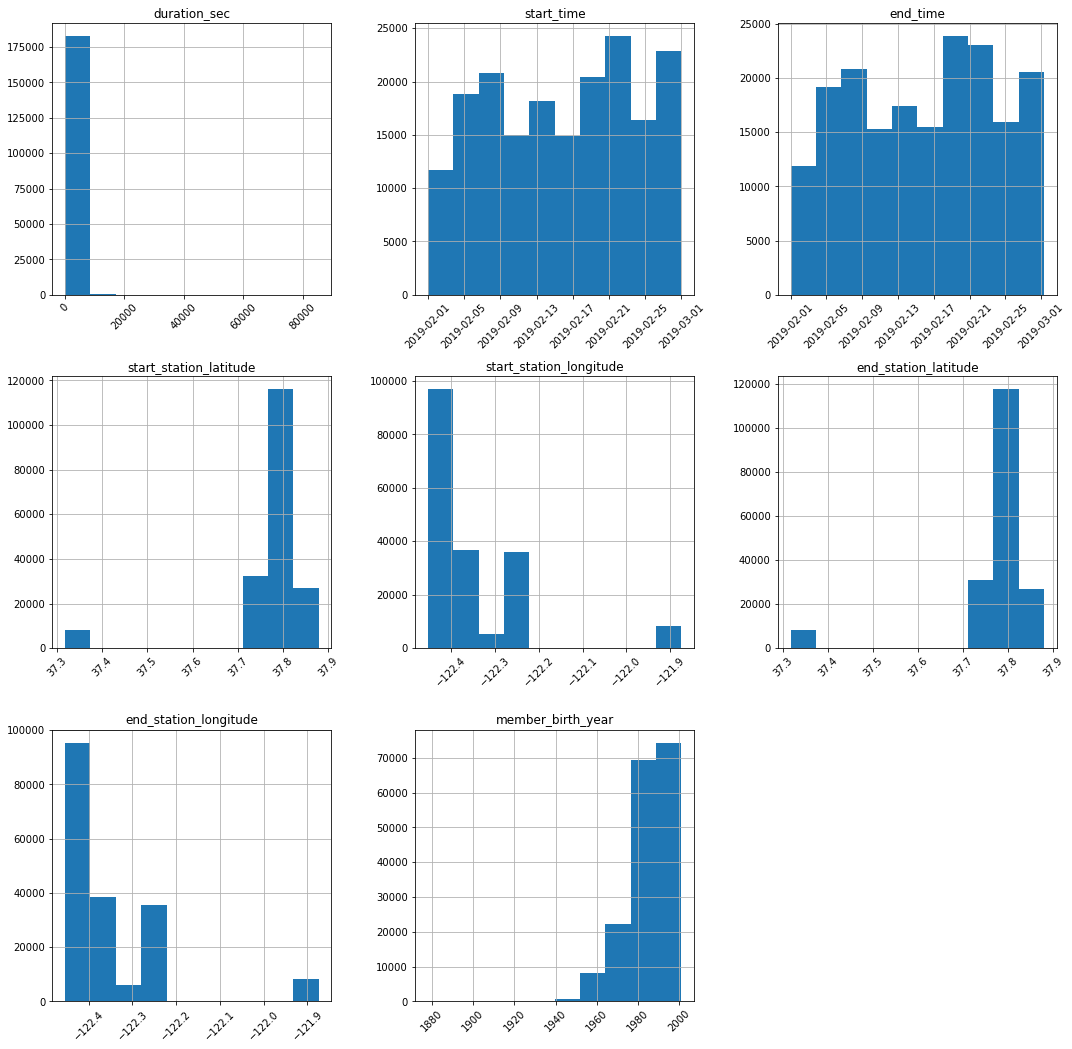

In [14]:
df_clean.hist(figsize = [18,18], xrot = '45');

In [15]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [16]:
df_clean[df_clean['duration_sec'] > 10000 ].count()[0]/df_clean.shape[0]
#There are only 0.6% of users using bike more than 10 000 sec. So when we plot the duration_sec feature, it can be divided into two groups.

0.0025134669487274553

In [17]:
#drop entries with NaN in 'member_birth_year'
df_clean = df_clean.dropna()

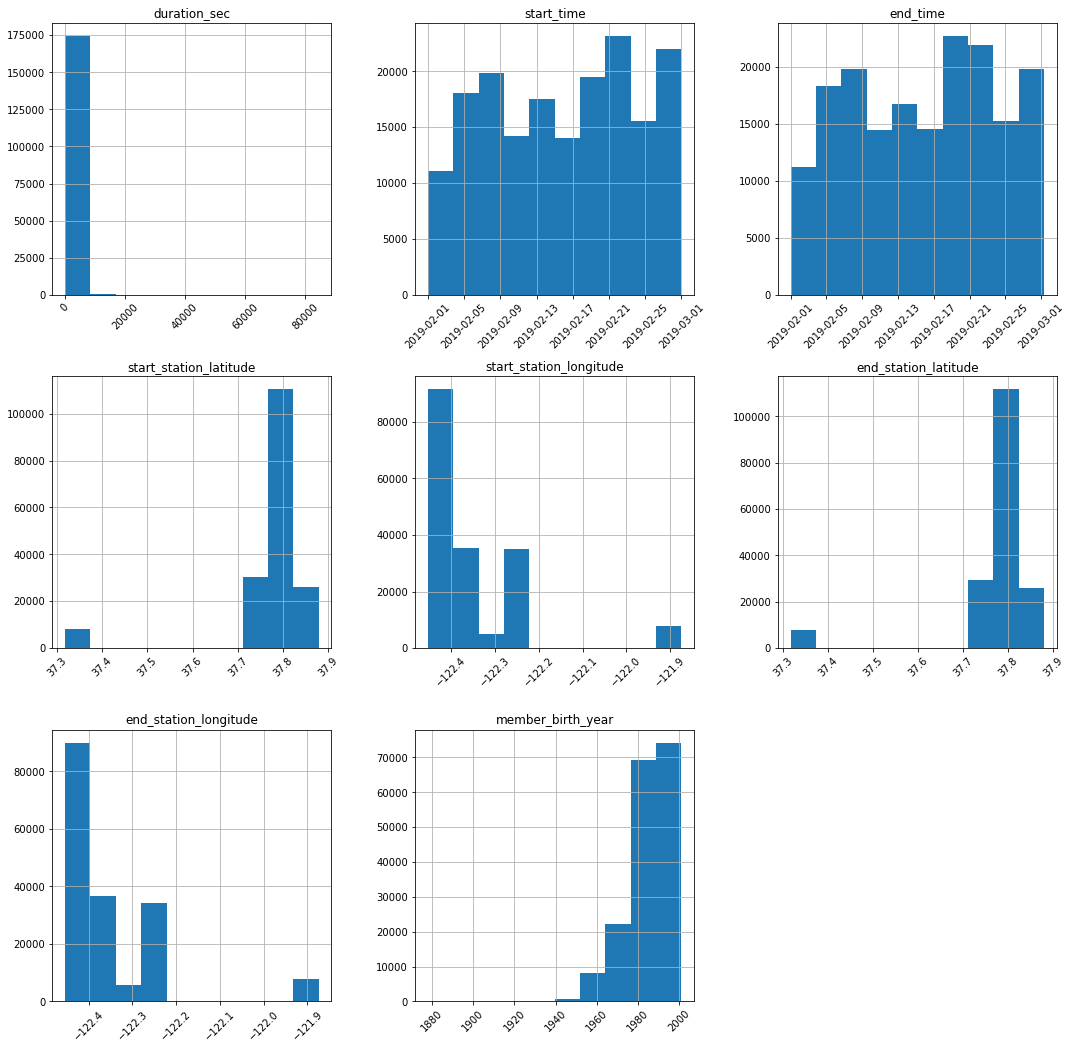

In [18]:
df_clean.hist(figsize = [18,18], xrot = '45');
#dropna did not change the ploting trend so analysis can continue without those entries having NaN

In [19]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

/var/folders/zt/nxcj7z6x6qgdyb_2097xzz_c0000gn/T/ipykernel_4057/1207811178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)


In [20]:
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

The dataframe consists of 183412 entries and 16 columns. There are missing values in start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, member_birth_year, member_gender and bike_share_for_all_trip. Besides, the datatypes are not all correct or suitable for analysis.

###What is/are the main features of interest in your dataset?

The main feature might be duration_sec in this dataset.

### What features in the dataset do you think will help support your investigation into your features of interest?

The main features that might be interesting for analyzing the including using timepoint of the day start_time and user information such as member_gender, member_birth_year.

## Univariate Exploration

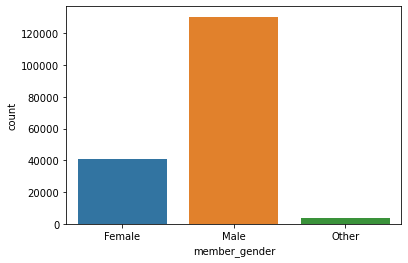

In [22]:
# find out which gender are more likely to use share bike
sb.countplot(data = df_clean, x = 'member_gender');

Therefore, the number of male members is more than three times of the number of female members.

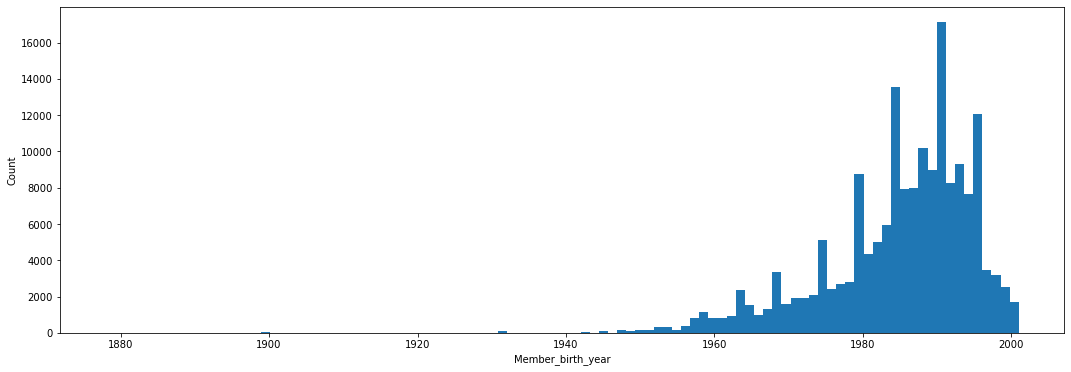

In [23]:
plt.figure(figsize = [18,6])
plt.hist(data = df_clean, x = 'member_birth_year', bins = 100)
plt.xlabel('Member_birth_year')
plt.ylabel('Count');

Therefore, the main users come from those were born between 1980 to 2000.

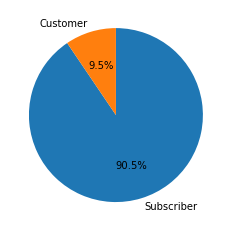

In [24]:
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);

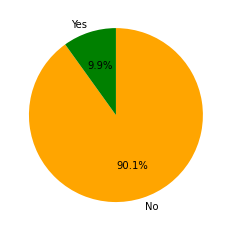

In [25]:
sorted_counts = df_clean['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', colors = ['orange', 'green'], startangle = 90, counterclock = False);

In [26]:
# find out which age group are more likely to use share bike
df_clean[df_clean['member_birth_year'] < 1920]
# There are 72 entries showed that the users was born before 1920, at the year 2019, those people would be around 100 years old, it is not so reasonable that they are still riding. Therefore, there might be typing mistakes when recording information.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900,Male,No
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.607,2019-02-03 17:56:42.949,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900,Male,No
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900,Male,No
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900,Male,No
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902,Female,No


In [27]:
np.log10(df_clean.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

The transformation is necessary for analyzing Duration_sec because of the large variance among data. From the hist plot, we could see that the values are all around 0, but after applying log transformation, the distribution of Duration_sec follows the normal distribution.

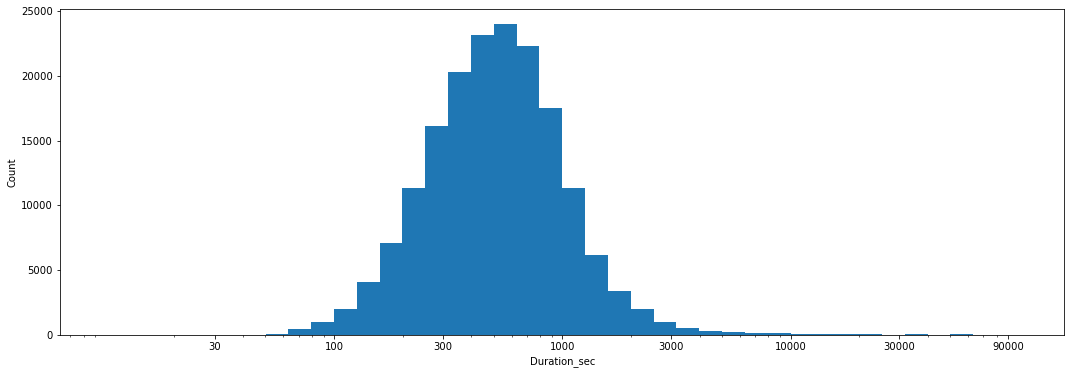

In [28]:
bins = 10 ** np.arange(1, 5+ 0.1, 0.1)
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 90000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize = [18,6])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration_sec')
plt.ylabel('Count');

In [29]:
#Most common start time and most common using day of the month
import time
df_clean['hour'] = df_clean.start_time.dt.hour
print(df_clean['hour'].value_counts().idxmax())
print(df_clean['hour'].value_counts().idxmin())

17
3


/var/folders/zt/nxcj7z6x6qgdyb_2097xzz_c0000gn/T/ipykernel_4057/1250034041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour'] = df_clean.start_time.dt.hour


The most popular time for using the bike is around 17:00, while aroud 3:00 there are few users. Therefore, the time for doing possible maintence for the bike can be arranged around 3.

In [30]:
print(df_clean['start_station_id'].value_counts().idxmax())
print(df_clean['start_station_id'].value_counts().idxmin())
print(df_clean['end_station_id'].value_counts().idxmax())
print(df_clean['end_station_id'].value_counts().idxmin())

58.0
344.0
67.0
301.0


A large number of users need bike at the start_station with id 58, so more bikes should be allocated to this place. Moreover, since a great number of bikes parked at the station with id, so it may be necessary to move the extra bikes to other places.

In [31]:
print(df_clean['bike_id'].value_counts().idxmax())

4794


The bike with id 4794 has been used too often, and more detailed maintence is necessary to be performed considering the safety.

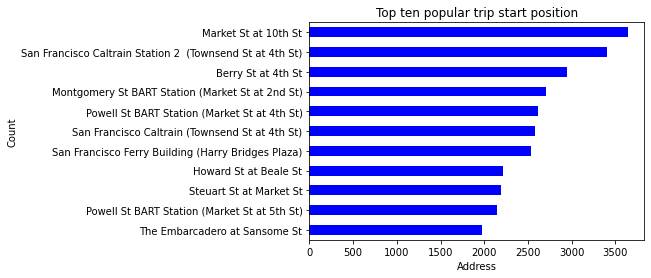

In [32]:
pop_start_station = df_clean.start_station_name.value_counts()[0:11].sort_values()
pop_start_station.plot(kind = 'barh', color = 'blue')
plt.xlabel('Address')
plt.ylabel('Count')
plt.title('Top ten popular trip start position');

The most popular trip start position is Market St at 10th st.

### Discuss the distributions of your variables of interest. Were there any unusualy points? Did you need to perform any transformations?
The number of male members is more than three times of the number of female members, and  the main users come from those were born between 1980 to 2000. The transformation is necessary for analyzing Duration_sec because of the large variance among data. From the hist plot, we could see that the values are all around 0, but after applying log transformation, the distribution of Duration_sec follows the normal distribution. 

Besides, a large number of users need bike at the start_station with id 58, so more bikes should be allocated to this place. Moreover, since a great number of bikes parked at the station with id, so it may be necessary to move the extra bikes to other places. The bike with id 4794 has been used too often, and more detailed maintence is necessary to be performed considering the safety. The most popular trip start position is Market St at 10th st.

### Of the features you investigated, were there any unusualy distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If you, why did you do this?
There were great variance of the duration time of trips, so the log transformation was applied for analysis. Data type were changed for further data analysis including start_time, end_time convert dtype to datetime to use time library; Station_id to object, end_station_id to object, bike_id to object for counting the trip frequency; user_type and member_gender to categorical type for the convience to plot data; birth_year to int as only the years were showed.

## Bivariate Exploration


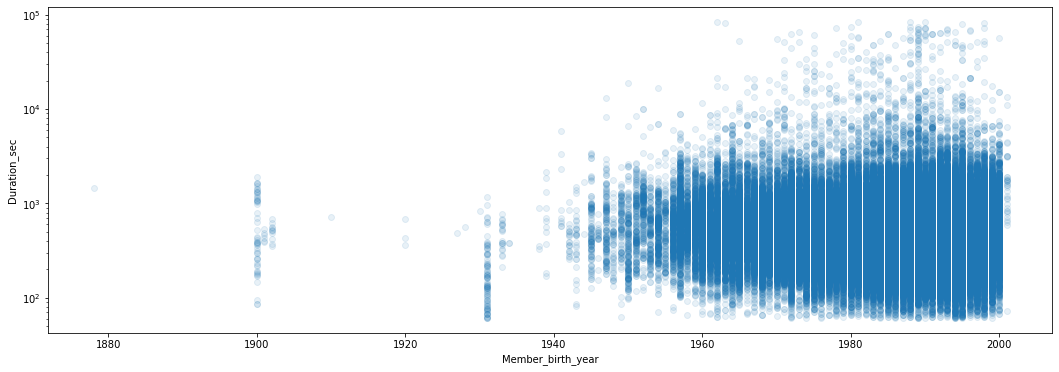

In [33]:
plt.figure(figsize = [18, 6])
plt.scatter(data = df_clean, x = 'member_birth_year', y = 'duration_sec', alpha = 1/10)
plt.yscale('log')
plt.xlabel('Member_birth_year')
plt.ylabel('Duration_sec')
plt.show()

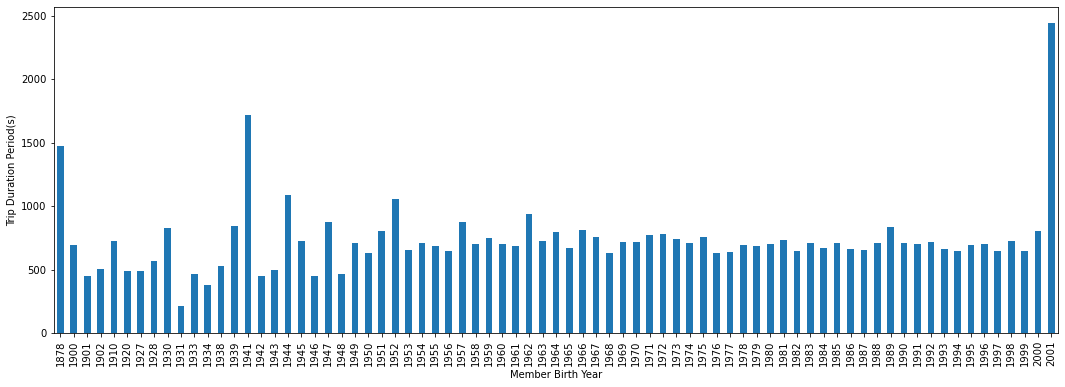

In [34]:
plt.figure(figsize = [18,6])
df_clean.groupby(['member_birth_year']).duration_sec.mean().plot(kind = 'bar')
plt.xlabel('Member Birth Year')
plt.ylabel('Trip Duration Period(s)');

In [35]:
# member_birth_year, member_gender and user_type might affect the duration_sec
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
    
df_clean['log_duration_sec'] = df_clean['duration_sec'].apply(log_trans)

/var/folders/zt/nxcj7z6x6qgdyb_2097xzz_c0000gn/T/ipykernel_4057/1920730678.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_duration_sec'] = df_clean['duration_sec'].apply(log_trans)


<Figure size 1296x1296 with 0 Axes>

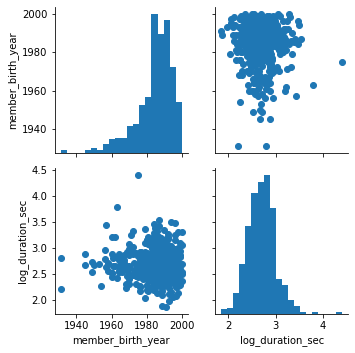

In [36]:
plt.figure(figsize = [18, 18])
df_clean_sample = df_clean.sample(n = 500, replace = False)
g = sb.PairGrid(data = df_clean_sample, vars = ['member_birth_year', 'log_duration_sec'])
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
plt.show();

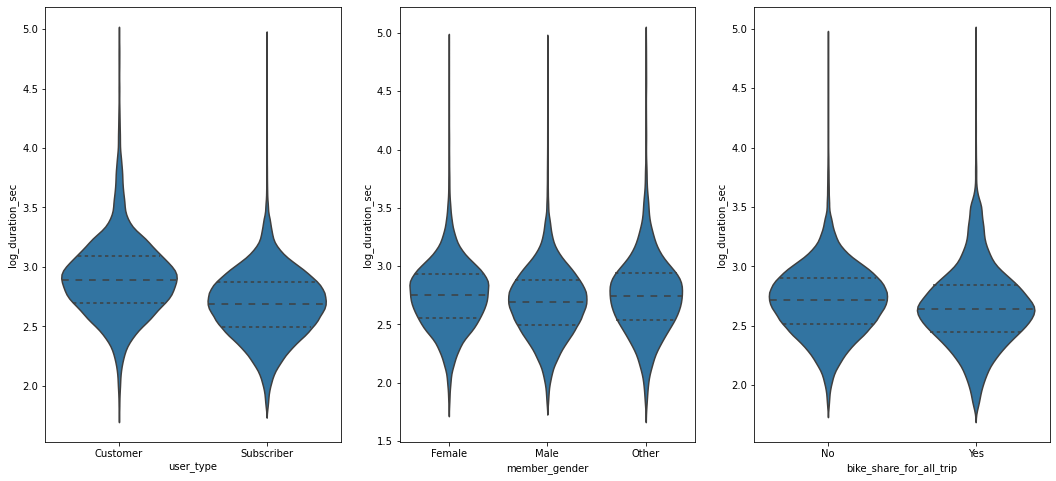

In [37]:
default_color = sb.color_palette()[0]
plt.figure(figsize = (18,8))
plt.subplot(1, 3, 1)
sb.violinplot(data = df_clean, x = 'user_type', y = 'log_duration_sec', color = default_color, inner = 'quartile')

plt.subplot(1, 3, 2)
sb.violinplot(data = df_clean, x = 'member_gender', y = 'log_duration_sec', color = default_color, inner = 'quartile')

plt.subplot(1, 3, 3)
sb.violinplot(data = df_clean, x = 'bike_share_for_all_trip', y = 'log_duration_sec', color = default_color, inner = 'quartile');


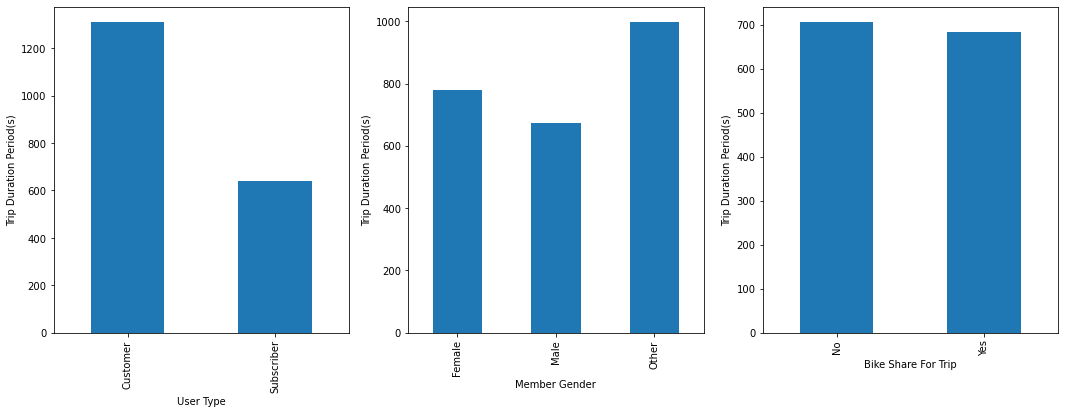

In [38]:
plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
df_clean.groupby(['user_type']).duration_sec.mean().plot(kind = 'bar')
plt.xlabel('User Type')
plt.ylabel('Trip Duration Period(s)')

plt.subplot(1,3,2)
df_clean.groupby(['member_gender']).duration_sec.mean().plot(kind = 'bar')
plt.xlabel('Member Gender')
plt.ylabel('Trip Duration Period(s)')

plt.subplot(1,3,3)
df_clean.groupby(['bike_share_for_all_trip']).duration_sec.mean().plot(kind = 'bar')
plt.xlabel('Bike Share For Trip')
plt.ylabel('Trip Duration Period(s)');


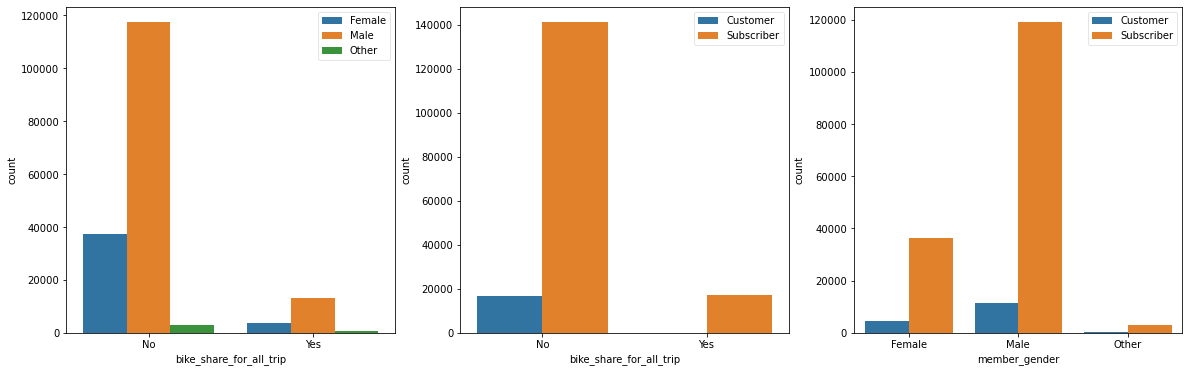

In [39]:
plt.figure(figsize =(20,6))
plt.subplot(1, 3, 1)
ax = sb.countplot(data=df_clean, x ='bike_share_for_all_trip', hue = 'member_gender')
ax.legend(loc = 1, framealpha = 0.5)

plt.subplot(1, 3, 2)
ax = sb.countplot(data=df_clean, x ='bike_share_for_all_trip', hue = 'user_type')
ax.legend(loc = 1, framealpha = 0.5)

plt.subplot(1, 3, 3)
ax = sb.countplot(data=df_clean, x ='member_gender', hue = 'user_type')
ax.legend(loc = 1, framealpha = 0.5);

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

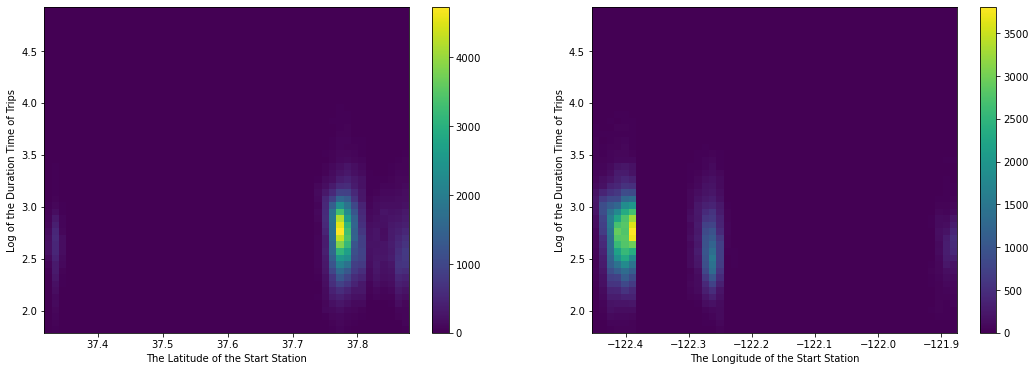

In [41]:
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
plt.hist2d(data = df_clean, x = 'start_station_latitude', y = 'log_duration_sec', bins = 50)
plt.colorbar()
plt.xlabel('The Latitude of the Start Station')
plt.ylabel('Log of the Duration Time of Trips')

plt.subplot(1,2,2)
plt.hist2d(data = df_clean, x = 'start_station_longitude', y = 'log_duration_sec', bins = 50)
plt.colorbar()
plt.xlabel('The Longitude of the Start Station')
plt.ylabel('Log of the Duration Time of Trips');

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

The average trip duration time of people born in 2001 was the longest, followed by those born in 1941. The average using time of Customer users was longer than subscriber; the average using time of the other gender type was the longest, and followed by female; and the average using time not for all trip was slightly higher than bike share for all trip. Moreover,the latitude of the start staion between 37.7 and 37.8 showed highest trip during time while the longitude of the start station around -122.4 showed highest trip during time.

### Did you observe any intereting relationships between the other features (not the main features of interest?

The relationships among categorical variables including bike_share_for_all_trip, member_gender and user_type were consistent with the tendency of each variables: i.e. more males used bike_share_for_all_trip; more males are subscribers; more subscribers used bike_share_for_all_trip. These were not surprising considering the bias distribution of member_gender and user_type. Interestingly, almost no custmoer users chose bike_share_for_all_trip. 


## Multivariate Exploration

In [42]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = 20
    bins_y = np.arange(1, 5+ 0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    

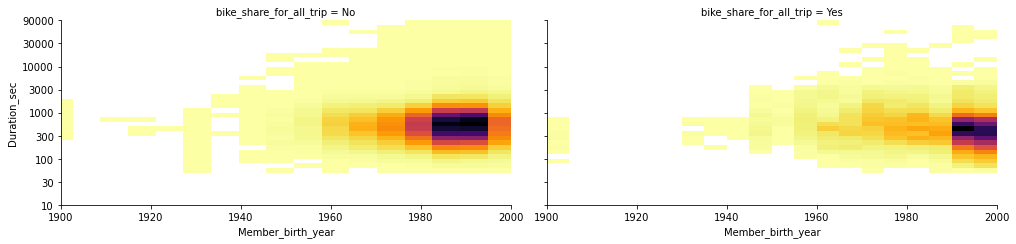

In [43]:
g = sb.FacetGrid(data = df_clean, col = 'bike_share_for_all_trip', height = 3.5, aspect = 2, margin_titles = True)
g.map(hist2dgrid, 'member_birth_year', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('Member_birth_year')
g.set_ylabels('Duration_sec')
g.set_yticklabels([10,30, 100, 300, 1000, 3000, 10000, 30000, 90000]);

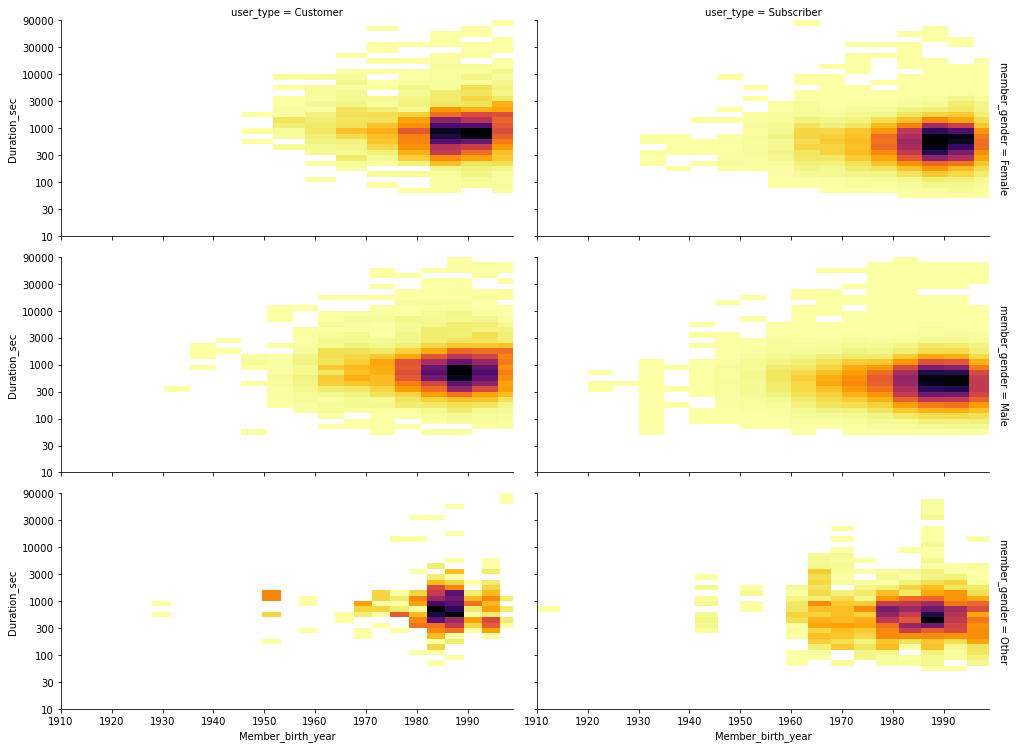

In [44]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', row = 'member_gender', height = 3.5, aspect = 2, margin_titles = True)
g.map(hist2dgrid, 'member_birth_year', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('Member_birth_year')
g.set_ylabels('Duration_sec')
g.set_yticklabels([10,30, 100, 300, 1000, 3000, 10000, 30000, 90000]);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Apparently, people chose bike_share_for_all_trip tend to be younger. The distribution of bike use duration time of other gender type showed obviously difference between customers and subscribers.

### Were there any interesting of surprising interactions between features?
Users who came from member_gender other mostly subscribers and their birth years were widely spread, while these features were not shown for male and female users.

## Conclusions

The number of the male users were three times more than female users while the most frequent users' ages were between 1980 to 2001. Additionally, 90.5% of users were subscribers while 9.5% were customers, but only 9.9% users chose using the bike for all trips. Considering the large variance of the bike using time, log transformation was applied for analysis, and the result showed that the using time of the bike followed normal distribution. Counting results showed that most popular trip start position is Market St at 10th st.

From biovariable exploration, bar plot showed that the average trip duration time of people born in 2001 was the longest, followed by those born in 1941. Vioplins showed the average using time of Customer user was longer than subscriber; the average using time of the other gender type was the longest, and followed by female; and the average using time not for all trip was slightly higher than bike share for all trip. The relationships among categorical variables including bike_share_for_all_trip, member_gender and user_type were consistent with the tendency of each variables: i.e. more males used bike_share_for_all_trip; more males are subscribers; more subscribers used bike_share_for_all_trip. These were not surprising considering the bias distribution of member_gender and user_type. Interestingly, almost no custmoer users chose bike_share_for_all_trip. Moreover,the latitude of the start staion around 37.8 showed highest trip during time while the longitude of the start station below -122.4 showed highest trip during time.

Beyond that, multivariable exploration revealed that people chose bike_share_for_all_trip tend to be younger. The distribution of bike use duration time of other gender type showed obviously difference between customers and subscribers.

However, data from longer time period and more cities are necessary for comprehensive and thorough analysis if it will be used for make decision regarding to promote the use of share bike.